In [11]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
customer_acq= pd.read_excel("Credit Card Data.xlsx",sheet_name="Customer Acqusition")
repayment = pd.read_excel("Credit Card Data.xlsx",sheet_name='Repayment')
spend = pd.read_excel("Credit Card Data.xlsx",sheet_name='Spend')
customer_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    float64
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    int64  
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


####  1. In the above dataset,

In [14]:
#repayment.loc[repayment['SL No:'].isna(),:]
repayment.dropna(axis=0,how ='all',inplace = True)
repayment

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,338932.141919
1,2,A1,2004-01-03,131778.688758
2,3,A1,2004-01-15,485981.516736
3,4,A1,2004-01-25,452865.826385
4,5,A1,2005-01-17,154684.838196
...,...,...,...,...
1495,1496,A67,2005-05-09,461916.047960
1496,1497,A68,2006-05-10,269635.645462
1497,1498,A69,2006-07-11,181524.046445
1498,1499,A70,2005-08-12,308330.678493


In [15]:
spend_repay = pd.merge(spend,repayment,left_on=['Customer','Sl No:'],right_on=['Customer','SL No:'],suffixes=['_spend','_repay'])
spend_repay

,Sl No:,Customer,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay
0,1,A1,2004-01-12,JEWELLERY,344054.980813,1,2004-01-12,338932.141919
1,2,A1,2004-01-03,PETRO,467747.601626,2,2004-01-03,131778.688758
2,3,A1,2004-01-15,CLOTHES,86878.954735,3,2004-01-15,485981.516736
3,4,A1,2004-01-25,FOOD,269175.011875,4,2004-01-25,452865.826385
4,5,A1,2005-01-17,CAMERA,3406.639477,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,418316.710886,1496,2005-05-09,461916.047960
1496,1497,A68,2006-03-25,BUS TICKET,222182.008427,1497,2006-05-10,269635.645462
1497,1498,A69,2006-03-31,BUS TICKET,100049.079260,1498,2006-07-11,181524.046445
1498,1499,A70,2006-03-23,BUS TICKET,316308.254003,1499,2005-08-12,308330.678493


In [16]:
customer_final=pd.merge(customer_acq,spend_repay,on='Customer',how='right')
customer_final

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,1,2004-01-12,338932.141919
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,PETRO,467747.601626,2,2004-01-03,131778.688758
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,CLOTHES,86878.954735,3,2004-01-15,485981.516736
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,FOOD,269175.011875,4,2004-01-25,452865.826385
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,CAMERA,3406.639477,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67,A67,57.841495,CHENNAI,Gold,500000,C29,Normal Salary,1496,2006-02-04,BUS TICKET,418316.710886,1496,2005-05-09,461916.047960
1496,68,A68,30.829863,TRIVANDRUM,Silver,100000,C30,Self Employed,1497,2006-03-25,BUS TICKET,222182.008427,1497,2006-05-10,269635.645462
1497,69,A69,15.216474,CALCUTTA,Platimum,10000,C31,Self Employed,1498,2006-03-31,BUS TICKET,100049.079260,1498,2006-07-11,181524.046445
1498,70,A70,11.259760,BOMBAY,Platimum,10001,C32,Self Employed,1499,2006-03-23,BUS TICKET,316308.254003,1499,2005-08-12,308330.678493


In [17]:
customer_final.drop_duplicates(keep=False)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,1,2004-01-12,338932.141919
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,PETRO,467747.601626,2,2004-01-03,131778.688758
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,CLOTHES,86878.954735,3,2004-01-15,485981.516736
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,FOOD,269175.011875,4,2004-01-25,452865.826385
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,CAMERA,3406.639477,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67,A67,57.841495,CHENNAI,Gold,500000,C29,Normal Salary,1496,2006-02-04,BUS TICKET,418316.710886,1496,2005-05-09,461916.047960
1496,68,A68,30.829863,TRIVANDRUM,Silver,100000,C30,Self Employed,1497,2006-03-25,BUS TICKET,222182.008427,1497,2006-05-10,269635.645462
1497,69,A69,15.216474,CALCUTTA,Platimum,10000,C31,Self Employed,1498,2006-03-31,BUS TICKET,100049.079260,1498,2006-07-11,181524.046445
1498,70,A70,11.259760,BOMBAY,Platimum,10001,C32,Self Employed,1499,2006-03-23,BUS TICKET,316308.254003,1499,2005-08-12,308330.678493


#### a. In case age is less than 18, replace it with mean of age values.

In [19]:
customer_final['Age']=np.where (customer_final.Age < 18,customer_final.Age.mean(),customer_final.Age)

In [20]:
customer_final

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,1,2004-01-12,338932.141919
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,PETRO,467747.601626,2,2004-01-03,131778.688758
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,CLOTHES,86878.954735,3,2004-01-15,485981.516736
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,FOOD,269175.011875,4,2004-01-25,452865.826385
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,CAMERA,3406.639477,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67,A67,57.841495,CHENNAI,Gold,500000,C29,Normal Salary,1496,2006-02-04,BUS TICKET,418316.710886,1496,2005-05-09,461916.047960
1496,68,A68,30.829863,TRIVANDRUM,Silver,100000,C30,Self Employed,1497,2006-03-25,BUS TICKET,222182.008427,1497,2006-05-10,269635.645462
1497,69,A69,35.721396,CALCUTTA,Platimum,10000,C31,Self Employed,1498,2006-03-31,BUS TICKET,100049.079260,1498,2006-07-11,181524.046445
1498,70,A70,35.721396,BOMBAY,Platimum,10001,C32,Self Employed,1499,2006-03-23,BUS TICKET,316308.254003,1499,2005-08-12,308330.678493


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [22]:
customer_final['Amount_spend']= np.where(customer_final.Amount_spend > customer_final.Limit,(customer_final.Limit*50)/100,customer_final.Amount_spend)

In [23]:
customer_final

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,1,2004-01-12,338932.141919
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,PETRO,467747.601626,2,2004-01-03,131778.688758
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,CLOTHES,86878.954735,3,2004-01-15,485981.516736
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,FOOD,269175.011875,4,2004-01-25,452865.826385
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,CAMERA,3406.639477,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67,A67,57.841495,CHENNAI,Gold,500000,C29,Normal Salary,1496,2006-02-04,BUS TICKET,418316.710886,1496,2005-05-09,461916.047960
1496,68,A68,30.829863,TRIVANDRUM,Silver,100000,C30,Self Employed,1497,2006-03-25,BUS TICKET,50000.000000,1497,2006-05-10,269635.645462
1497,69,A69,35.721396,CALCUTTA,Platimum,10000,C31,Self Employed,1498,2006-03-31,BUS TICKET,5000.000000,1498,2006-07-11,181524.046445
1498,70,A70,35.721396,BOMBAY,Platimum,10001,C32,Self Employed,1499,2006-03-23,BUS TICKET,5000.500000,1499,2005-08-12,308330.678493


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [25]:
customer_final['Amount_repay']= np.where(customer_final.Amount_repay > customer_final.Limit,customer_final.Limit,customer_final.Amount_repay)

In [26]:
customer_final

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,1,2004-01-12,338932.141919
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,PETRO,467747.601626,2,2004-01-03,131778.688758
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,CLOTHES,86878.954735,3,2004-01-15,485981.516736
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,FOOD,269175.011875,4,2004-01-25,452865.826385
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,CAMERA,3406.639477,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67,A67,57.841495,CHENNAI,Gold,500000,C29,Normal Salary,1496,2006-02-04,BUS TICKET,418316.710886,1496,2005-05-09,461916.047960
1496,68,A68,30.829863,TRIVANDRUM,Silver,100000,C30,Self Employed,1497,2006-03-25,BUS TICKET,50000.000000,1497,2006-05-10,100000.000000
1497,69,A69,35.721396,CALCUTTA,Platimum,10000,C31,Self Employed,1498,2006-03-31,BUS TICKET,5000.000000,1498,2006-07-11,10000.000000
1498,70,A70,35.721396,BOMBAY,Platimum,10001,C32,Self Employed,1499,2006-03-23,BUS TICKET,5000.500000,1499,2005-08-12,10001.000000


### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [29]:
customer_final.Customer.nunique()

100

#### b. How many distinct categories exist?

In [31]:
customer_final
#customer_final.groupby(['Customer','Type']).count().head(20)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,JEWELLERY,344054.980813,1,2004-01-12,338932.141919
1,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,2,2004-01-03,PETRO,467747.601626,2,2004-01-03,131778.688758
2,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,3,2004-01-15,CLOTHES,86878.954735,3,2004-01-15,485981.516736
3,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,4,2004-01-25,FOOD,269175.011875,4,2004-01-25,452865.826385
4,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed,5,2005-01-17,CAMERA,3406.639477,5,2005-01-17,154684.838196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67,A67,57.841495,CHENNAI,Gold,500000,C29,Normal Salary,1496,2006-02-04,BUS TICKET,418316.710886,1496,2005-05-09,461916.047960
1496,68,A68,30.829863,TRIVANDRUM,Silver,100000,C30,Self Employed,1497,2006-03-25,BUS TICKET,50000.000000,1497,2006-05-10,100000.000000
1497,69,A69,35.721396,CALCUTTA,Platimum,10000,C31,Self Employed,1498,2006-03-31,BUS TICKET,5000.000000,1498,2006-07-11,10000.000000
1498,70,A70,35.721396,BOMBAY,Platimum,10001,C32,Self Employed,1499,2006-03-23,BUS TICKET,5000.500000,1499,2005-08-12,10001.000000


#### c. What is the average monthly spend by customers?

In [33]:
customer_final.groupby(customer_final.Month_spend.dt.month)['Amount_spend'].mean().reset_index()

,Month_spend,Amount_spend
0,1,153074.045426
1,2,161588.978404
2,3,144319.257741
3,4,145284.697557
4,5,149466.012022
5,6,166297.499596
6,7,179130.334300
7,8,180310.239301
8,9,150616.912600
9,10,110842.647550


#### d. What is the average monthly repayment by customers?

In [35]:
customer_final.groupby(customer_final.Month_repay.dt.month)['Amount_repay'].mean().reset_index()

,Month_repay,Amount_repay
0,1,165905.237443
1,2,160934.572612
2,3,172041.556360
3,4,145718.823377
4,5,182598.051975
5,6,159447.404034
6,7,145543.401628
7,8,175245.744288
8,9,118936.574626
9,10,173375.652849


##### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts

In [37]:

customer_final['Monthly_profit'] = np.where(customer_final['Amount_repay'] > customer_final['Amount_spend'],
                                           (customer_final['Amount_repay'] - customer_final['Amount_spend']) *2.9/100,
                                           customer_final['Amount_repay'] - customer_final['Amount_spend'])

In [38]:
customer_final.tail(50)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,SL No:,Month_repay,Amount_repay,Monthly_profit
1450,61,A61,35.721396,COCHIN,Gold,500000,C23,Govt,1451,2005-11-20,BUS TICKET,262414.706945,1451,2006-04-03,137950.365175,-124464.341770
1451,62,A62,46.172414,BOMBAY,Gold,500000,C24,Normal Salary,1452,2006-11-21,BUS TICKET,402820.677278,1452,2006-04-04,343317.681439,-59502.995839
1452,63,A63,75.776690,BANGALORE,Gold,500000,C25,Self Employed,1453,2005-11-22,BUS TICKET,243076.303006,1453,2004-01-12,357936.148913,3330.935531
1453,36,A36,35.721396,BOMBAY,Platimum,100002,C18,Normal Salary,1454,2004-11-23,BUS TICKET,57167.030351,1454,2004-01-03,92580.831883,1027.000244
1454,37,A37,67.953927,BANGALORE,Platimum,100003,C19,Normal Salary,1455,2005-05-24,BUS TICKET,50001.500000,1455,2004-01-15,84725.390268,1006.992818
1455,38,A38,56.360358,CHENNAI,Platimum,500000,C20,Self Employed,1456,2005-05-25,BUS TICKET,32012.679365,1456,2004-01-25,439753.346167,11824.479337
1456,39,A39,45.731103,TRIVANDRUM,Platimum,500000,C21,Salaried_MNC,1457,2005-05-26,BUS TICKET,430.187089,1457,2004-01-12,137183.757827,3965.853551
1457,40,A40,35.721396,CALCUTTA,Platimum,500000,C22,Salaried_Pvt,1458,2005-05-27,BUS TICKET,475178.917221,1458,2004-01-03,392154.563134,-83024.354087
1458,41,A41,38.179175,COCHIN,Platimum,500000,C23,Govt,1459,2005-05-28,BUS TICKET,142728.713638,1459,2004-01-15,64532.684156,-78196.029482
1459,42,A42,59.042377,BOMBAY,Gold,500000,C24,Normal Salary,1460,2005-05-29,BUS TICKET,236846.004679,1460,2004-01-25,192668.252239,-44177.752440


#### f. What are the top 5 product types?

In [49]:
customer_final.groupby(['Product','Type'])['Customer'].count().sort_values(ascending=False).reset_index().head(5)

,Product,Type,Customer
0,Gold,PETRO,83
1,Gold,CAMERA,75
2,Platimum,PETRO,72
3,Platimum,FOOD,68
4,Gold,AIR TICKET,63


#### g. Which city is having maximum spend?

In [42]:
customer_final.groupby('City')['Amount_spend'].sum().sort_values(ascending=False).head(1)

City
COCHIN    4.857454e+07
Name: Amount_spend, dtype: float64

#### h. Which age group is spending more money?

In [44]:
customer_final.groupby('Age')['Amount_spend'].sum().sort_values(ascending=False).head(1)

Age
35.721396    7.863950e+07
Name: Amount_spend, dtype: float64

#### i. Who are the top 10 customers in terms of repayment?

In [46]:
customer_final.groupby('Customer')['Amount_repay'].sum().sort_values(ascending=False).head(10)

Customer
A61    9.672794e+06
A60    9.168150e+06
A42    8.928473e+06
A13    8.496396e+06
A38    8.205337e+06
A43    7.976031e+06
A40    7.671796e+06
A14    7.655255e+06
A44    7.637482e+06
A26    7.472189e+06
Name: Amount_repay, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

<Axes: xlabel='Product,City'>

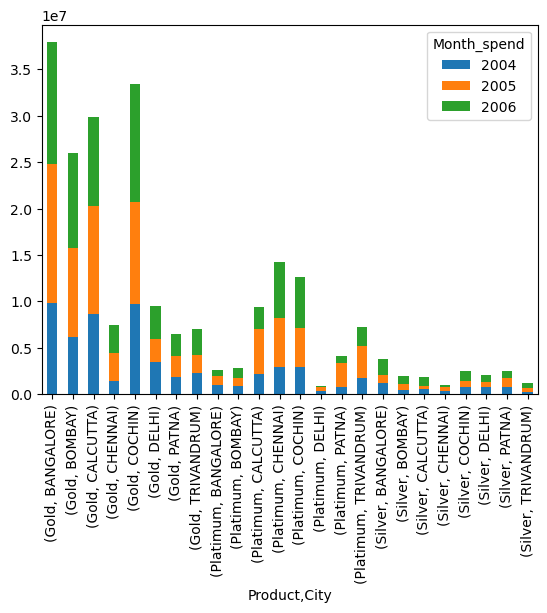

In [75]:
#summary1 = customer_final.loc[customer_final.Month_spend.dt.year]
#customer_final.groupby(['City','Product',customer_final.Month_spend.dt.year])['Amount_spend'].sum().reset_index()
summ = pd.crosstab(index=[customer_final.Product,customer_final.City],columns = customer_final.Month_spend.dt.year,values = customer_final.Amount_spend, aggfunc = 'sum').plot(kind='bar', stacked= True)
#pd.pivot(customer_final ,index=['Customer'],columns = ['Product'])
summ

### 4. Create graphs for

 #### a. Monthly comparison of total spends, city wise

<Axes: xlabel='Month_spend'>

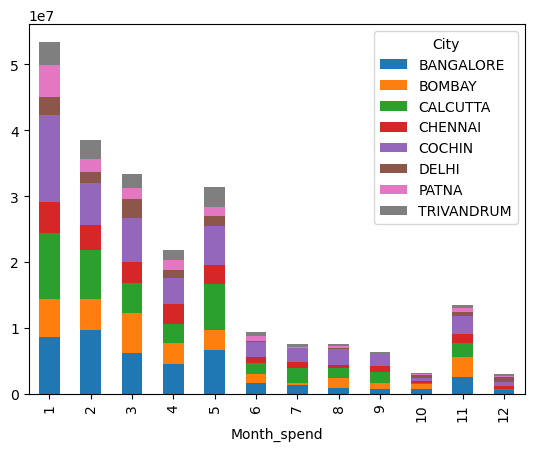

In [61]:
city_mothly_spend = pd.crosstab(index=customer_final.Month_spend.dt.month,columns = customer_final.City,values = customer_final.Amount_spend,aggfunc='sum')
city_mothly_spend.plot(kind ='bar',stacked =True)

#### b. Comparison of yearly spend on air tickets

<Axes: ylabel='Amount_spend'>

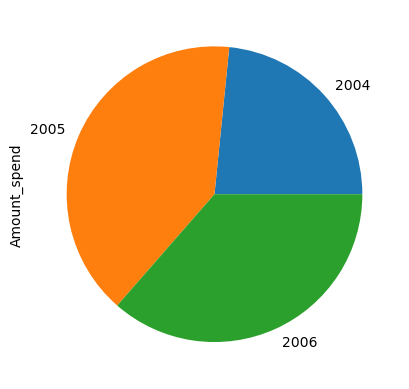

In [63]:
yearly_airticket_cost = customer_final.loc[customer_final.Type == 'AIR TICKET',:].groupby(customer_final.Month_spend.dt.year)['Amount_spend'].sum()
yearly_airticket_cost.plot(kind ='pie')

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

<Axes: xlabel='Month_spend'>

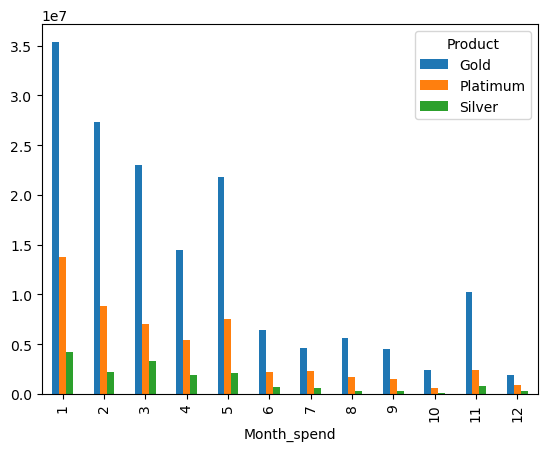

In [65]:
pd.crosstab(index=customer_final.Month_spend.dt.month,columns =customer_final.Product,values = customer_final.Amount_spend,aggfunc ='sum' ).plot(kind ='bar')

####  5. Write user defined PYTHON function to perform the following analysis:
     You need to find top 10 customers for each city in terms of their repayment amount by 
    different products and by different time periods i.e. year or month. The user should be able 
    to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
    function should automatically take these inputs while identifying the top 10 customers

In [79]:
def get_top_customer(month,year,product):
    if (month == 0 and year):
        print ("Top 10 customers based on repayment during the year:",year)
        customer_sumry = customer_final.loc[(customer_final.Month_repay.dt.year == year) & (customer_final.Product == product) ,:]
    elif (month and year):
        print ("Top 10 customers based on repayment during the month,year:",month,",",year)
        customer_sumry = customer_final.loc[((customer_final.Month_repay.dt.month == month) & (customer_final.Month_repay.dt.year == year)) & (customer_final.Product == product) ,:]
    elif (year == 0 and month):
        print ("Top 10 customers based on repayment during the Month:",month)
        customer_sumry = customer_final.loc[(customer_final.Month_repay.dt.month == month) & (customer_final.Product == product) ,:]
    customer_result = customer_sumry.groupby('Customer')['Amount_repay'].sum().sort_values(ascending= False).head(10)
    print ("customer_result",customer_result)
    if customer_result.empty:
        print("There are no customers with the given data")
    else:
        return (customer_result)

unique_years = customer_final.Month_spend.dt.year.unique()
year = int(input(" Enter the year to get top 10 customers:"))
if ((year != 0) and (year not in unique_years)):
    print ("Enter any of the year",unique_years)
    year = int(input(" Enter the year to get top 10 customers:"))
month = int(input("Enter the month to get top 10 customers(1-12):"))
product = input("Enter the product to get the customers(Gold/Silver/Platinum):").capitalize()
product_list =['Gold','Silver','Platinum']
if product in product_list:
    pass
else:
    print("Enter the valid product")
    product = input("Enter the product to get the customers(Gold/Silver/Platinum):").capitalize()
result = get_top_customer(month,year,product)


 Enter the year to get top 10 customers: 2004
Enter the month to get top 10 customers(1-12): 10
Enter the product to get the customers(Gold/Silver/Platinum): Gold


Top 10 customers based on repayment during the month,year: 10 , 2004
customer_result Series([], Name: Amount_repay, dtype: float64)
There are no customers with the given data
